In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# check dataset in datasets folder
raw_data = pd.read_csv('../DataSets/binianmalignent.csv')
raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


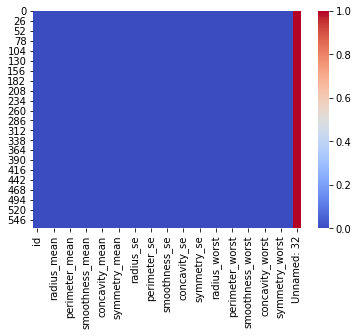

In [3]:
sns.heatmap(raw_data.isnull() , cmap='coolwarm')
# red indicate's that column has null values

## Data Preprocessing 

In [4]:
# replace labels with integer number

In [5]:
raw_data['diagnosis'].replace(to_replace = ['B','M'] , value = [ 1 , 0 ], inplace =True)

In [6]:
i = int((raw_data[raw_data['diagnosis'] == 0]).shape[0] * .75)
training_data_malignant = raw_data[raw_data['diagnosis'] == 0].iloc[ : i,:]
testing_data_malignant = raw_data[raw_data['diagnosis'] == 0].iloc[i : ,:]

training_data_benign = raw_data[raw_data['diagnosis'] == 1].iloc[ : i,:]
testing_data_benign = raw_data[raw_data['diagnosis'] == 1].iloc[i :i + testing_data_malignant.shape[0] ,:]


# we calculate the probability of something to be a BENIGH 

In [7]:
training_data = training_data_benign.append(training_data_malignant)   # now it contain 50-50 % of both type of data
testing_data = testing_data_benign.append(testing_data_malignant)

training_label = training_data['diagnosis']
training_data.drop(['id','diagnosis','Unnamed: 32'] , axis=1 , inplace = True)

testing_label = testing_data['diagnosis']
testing_data.drop(['id','diagnosis','Unnamed: 32'] , axis=1 , inplace = True)
training_data.head()

training_data['bias'] = np.ones([training_data.shape[0],1] , dtype=int)
training_data.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,bias
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1


In [8]:
# Normalizing zero mean

In [9]:
training_data = training_data / np.mean(training_data)
testing_data = testing_data / np.mean(testing_data)
training_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,bias
19,0.929205,0.741140,0.919373,0.813183,0.996328,0.728577,0.654693,0.858440,1.017570,0.916864,...,0.741277,0.888404,0.741140,1.064016,0.642194,0.788240,1.020162,0.989109,0.847875,1.0
20,0.897637,0.810815,0.900136,0.746698,1.095258,1.138262,0.448775,0.558408,1.061835,1.083031,...,0.788617,0.856236,0.657042,0.969437,1.005489,0.623337,0.576851,1.057885,0.955801,1.0
21,0.652228,0.642046,0.634290,0.393309,1.043297,0.581858,0.290407,0.372751,0.979782,1.097978,...,0.602720,0.580359,0.328156,0.978303,0.415814,0.292440,0.493210,0.814013,0.907912,1.0
37,0.894206,0.950682,0.868390,0.752155,0.915228,0.337535,0.251699,0.524832,0.791923,0.932288,...,0.877909,0.752604,0.568881,0.716807,0.167304,0.159396,0.397055,0.660181,0.720559,1.0
46,0.562464,0.869136,0.543572,0.289920,0.876206,0.532653,0.156010,0.106241,0.954950,1.034056,...,0.845194,0.510231,0.252396,0.958353,0.491516,0.226908,0.203082,1.031637,0.865395,1.0


### Lets check most dependent features

In [10]:
def heatmap(data):
    """ Pass covariance or correlation with data"""
    plt.figure(figsize=[15,15])
    sns.heatmap(data ,cmap='coolwarm' , annot_kws={'size': 7},
            cbar = True,  square = True, annot=True, fmt= '.1f')
    plt.show()
#heatmap(training_data.corr())

In [11]:
a  = training_data.columns.tolist()
a.reverse()
#heatmap((training_data[a].corr()))

# we have 30 features and 2 labels i.e either data has malignent or benign
# We use 30 neurons in input layer , 30-30 neurons in 2 hidden layers, and 1 neuron in output layer

In [12]:
training_data = np.array(training_data)
testing_data = np.array(testing_data)
training_label = np.array(training_label)
testing_label = np.array(testing_label)
training_data

array([[0.92920532, 0.74113964, 0.91937318, ..., 0.98910888, 0.84787479,
        1.        ],
       [0.89763704, 0.81081502, 0.90013636, ..., 1.05788467, 0.95580099,
        1.        ],
       [0.65222801, 0.64204576, 0.63428971, ..., 0.81401302, 0.90791166,
        1.        ],
       ...,
       [1.61341337, 1.25260857, 1.63039997, ..., 0.8615248 , 0.90382354,
        1.        ],
       [1.35057316, 1.11893505, 1.36549939, ..., 1.34395211, 0.92484813,
        1.        ],
       [1.08087029, 0.99197102, 1.12582744, ..., 1.41040215, 1.22643412,
        1.        ]])

In [43]:
class NeuralNetwork():

    def __init__(self , lmda = 0):
        self.input_layer_n = 31
        self.hidden_layer1_n = 31
        self.hidden_layer2_n = 31
        self.output_layer = 1
        self.lmda = lmda
        
        self.theta_layer_1 = np.random.randn(self.input_layer_n , self.hidden_layer1_n)
        self.theta_layer_2 = np.random.randn(self.hidden_layer1_n , self.hidden_layer2_n)
        self.theta_layer_3 = np.random.randn(self.hidden_layer2_n , self.output_layer)
        
    def sigmoid(self, activation , theta ):
         return (1 / (1 + np.exp(-np.matmul(activation , theta))))
        
    def forwardPropagation(self , X ):
        self.activation_layer_0 = X
        self.activation_layer_1 = self.sigmoid(self.activation_layer_0 , self.theta_layer_1)
        self.activation_layer_2 = self.sigmoid(self.activation_layer_1 , self.theta_layer_2)
        self.activation_layer_3 = self.sigmoid(self.activation_layer_2 , self.theta_layer_3)
        return self.activation_layer_3
    
    def costFunction(self, X , y):
        self.y_cap = self.forwardPropagation(X)
        c = -np.sum((np.dot(y.T , np.log(self.y_cap))  + np.dot(( 1 - y).T , np.log(1-self.y_cap)))) + (self.lmda*( (np.sum(self.theta_layer_1)) + (np.sum(self.theta_layer_2)) + (np.sum(self.theta_layer_1)) ))
        return c
    
    def costFunctionDerivative(self,X,y):
        self.y_cap = self.forwardPropagation(X)   # derivative w.r.t all layers activation
        dA_dtheta_layer_1 = np.dot(self.activation_layer_0.T ,(self.activation_layer_1*(1-self.activation_layer_1)))   
        dA_dtheta_layer_2 = np.dot(self.activation_layer_1.T ,(self.activation_layer_2*(1-self.activation_layer_2)))
        dA_dtheta_layer_3 = np.dot(self.activation_layer_2.T ,(self.activation_layer_3*(1-self.activation_layer_3)))
        # this is called forward propagation
                            
        dL_dA3 = np.mean( self.y_cap - y) 
        dL_dA2 = np.dot(self.theta_layer_3.T , dA_dtheta_layer_3)
        dL_dA1 = np.dot(self.theta_layer_2.T , dA_dtheta_layer_2)
        # this is called backward propagation error
        
        #print(dA_dtheta_layer_1.shape , dL_dA1.shape)
        #print(dA_dtheta_layer_2.shape , dL_dA2.shape)
        #print(dA_dtheta_layer_3.shape , dL_dA3.shape)
        dL_dtheta_layer_1 = np.multiply(dA_dtheta_layer_1 , dL_dA1) 
        dL_dtheta_layer_2 = np.multiply(dA_dtheta_layer_2 , dL_dA2) 
        dL_dtheta_layer_3 = np.multiply(dA_dtheta_layer_3 , dL_dA3) 
        
        
        return dL_dtheta_layer_1 , dL_dtheta_layer_2 , dL_dtheta_layer_3

In [51]:
def batchGradientDecent(NN , X , y , batch_size = 32):
    alpha = 0.001
    i = 1
    itera = []
    cf = []
    
    while ( i < 2000):
        index = np.random.randint(0,X.shape[0],size = (batch_size,))
        
        initial_cost = NN.costFunction(X[index] , y[index])
        
        t1,t2,t3 = NN.costFunctionDerivative(X[index] , y[index])
        
        NN.theta_layer_1 = NN.theta_layer_1 - alpha * t1
        NN.theta_layer_2 = NN.theta_layer_2 - alpha * t2
        NN.theta_layer_3 = NN.theta_layer_3 - alpha * t3
        
        final_cost = NN.costFunction(X[index] , y[index])
        
        itera.append(i)
        cf.append(final_cost)
        i+=1
        
        print("iteration {} value {}".format(i , final_cost))
        
    return itera , cf

In [64]:
NN = NeuralNetwork(.04)
itera, cf = batchGradientDecent(NN , training_data , training_label )


iteration 2 value 37.04695336647015
iteration 3 value 38.75617553842849
iteration 4 value 54.2564311800907
iteration 5 value 37.41409157765575
iteration 6 value 41.270509277688426
iteration 7 value 35.945936762589234
iteration 8 value 31.387774817987612
iteration 9 value 28.62290409313124
iteration 10 value 23.694618346761253
iteration 11 value 23.476366291914925
iteration 12 value 25.818778898766123
iteration 13 value 25.229272121076953
iteration 14 value 24.160205712078387
iteration 15 value 20.897019415726803
iteration 16 value 28.064978309643358
iteration 17 value 24.182115658277443
iteration 18 value 23.662061832309522
iteration 19 value 20.844224560113297
iteration 20 value 27.829587745176855
iteration 21 value 32.80780991101243
iteration 22 value 30.46766537334671
iteration 23 value 31.02734610492949
iteration 24 value 27.13169926476297
iteration 25 value 29.82494585718019
iteration 26 value 26.156080655890094
iteration 27 value 25.62714933487883
iteration 28 value 25.1802114299

iteration 288 value 27.447970373637226
iteration 289 value 27.6213573549368
iteration 290 value 27.715644569902018
iteration 291 value 27.698896457526168
iteration 292 value 27.617648004612963
iteration 293 value 27.64702615875861
iteration 294 value 27.623413107410407
iteration 295 value 27.594854870024072
iteration 296 value 27.620305965047073
iteration 297 value 27.70093425920128
iteration 298 value 27.730117290885644
iteration 299 value 27.695412493865458
iteration 300 value 27.567224236367306
iteration 301 value 27.59283831093288
iteration 302 value 27.64002914407642
iteration 303 value 27.823312178300615
iteration 304 value 27.70612481758596
iteration 305 value 27.701499803978464
iteration 306 value 27.809834527233505
iteration 307 value 27.73134804538346
iteration 308 value 27.740937189472298
iteration 309 value 27.756726556806175
iteration 310 value 27.845965390883322
iteration 311 value 27.74621128350325
iteration 312 value 27.73623467163405
iteration 313 value 27.814840330548

iteration 543 value 28.708188809911732
iteration 544 value 28.802572040727753
iteration 545 value 28.803780542527047
iteration 546 value 28.736250807630704
iteration 547 value 28.763705435070733
iteration 548 value 28.83741802498379
iteration 549 value 28.7531108171681
iteration 550 value 28.764173670144444
iteration 551 value 28.77309590118917
iteration 552 value 28.745232181328845
iteration 553 value 28.84375312546259
iteration 554 value 28.693781718611792
iteration 555 value 28.731192701110803
iteration 556 value 28.806632380404444
iteration 557 value 28.79432286208397
iteration 558 value 28.857309858586003
iteration 559 value 28.80831631934924
iteration 560 value 28.791635633245413
iteration 561 value 28.869990065554756
iteration 562 value 28.761702320784348
iteration 563 value 28.869666106961915
iteration 564 value 28.764101082424393
iteration 565 value 28.8535610252705
iteration 566 value 28.886461651471823
iteration 567 value 28.707199998157723
iteration 568 value 28.77082410199

iteration 795 value 29.501601030209212
iteration 796 value 29.506854666083836
iteration 797 value 29.472156597219474
iteration 798 value 29.509100837466107
iteration 799 value 29.365594464552416
iteration 800 value 29.487165399594076
iteration 801 value 29.513915870605015
iteration 802 value 29.47234929856501
iteration 803 value 29.45046807680475
iteration 804 value 29.481927929895306
iteration 805 value 29.4642447861928
iteration 806 value 29.470498473681427
iteration 807 value 29.46554974385878
iteration 808 value 29.474814893791795
iteration 809 value 29.48299007721082
iteration 810 value 29.52048599050373
iteration 811 value 29.49097607697802
iteration 812 value 29.49671552055895
iteration 813 value 29.3642841155078
iteration 814 value 29.46645394855952
iteration 815 value 29.573291421899796
iteration 816 value 29.543527358259425
iteration 817 value 29.370467086896014
iteration 818 value 29.465650647471126
iteration 819 value 29.48588771219714
iteration 820 value 29.49403264254891


iteration 1048 value 30.019728775214208
iteration 1049 value 30.026152684393765
iteration 1050 value 29.979515103370453
iteration 1051 value 29.902716063663362
iteration 1052 value 29.96710276832335
iteration 1053 value 29.937596177392
iteration 1054 value 29.8989862470155
iteration 1055 value 30.053289557173212
iteration 1056 value 30.005101262994526
iteration 1057 value 30.085682807912537
iteration 1058 value 30.046210348989987
iteration 1059 value 30.090573236838537
iteration 1060 value 29.964807264061385
iteration 1061 value 30.113324531341632
iteration 1062 value 30.111549694319365
iteration 1063 value 30.103744701789594
iteration 1064 value 29.98081179707281
iteration 1065 value 30.057574527322753
iteration 1066 value 30.049268516731885
iteration 1067 value 29.989143210441032
iteration 1068 value 29.93381144781709
iteration 1069 value 30.072214100694048
iteration 1070 value 30.04864251251517
iteration 1071 value 30.074820243256177
iteration 1072 value 30.07590308208167
iteration 

iteration 1306 value 30.40832407486822
iteration 1307 value 30.406388759958134
iteration 1308 value 30.41220643164938
iteration 1309 value 30.4843012505589
iteration 1310 value 30.40694286521667
iteration 1311 value 30.297140624834313
iteration 1312 value 30.431295648081942
iteration 1313 value 30.31406846530247
iteration 1314 value 30.451351536534418
iteration 1315 value 30.411871190314102
iteration 1316 value 30.41702762426729
iteration 1317 value 30.47539752629106
iteration 1318 value 30.42691242120061
iteration 1319 value 30.386050360258274
iteration 1320 value 30.428059433285
iteration 1321 value 30.34882254171766
iteration 1322 value 30.310572375789356
iteration 1323 value 30.4405912577995
iteration 1324 value 30.3909187955584
iteration 1325 value 30.40300442252161
iteration 1326 value 30.319863614168632
iteration 1327 value 30.419480882533986
iteration 1328 value 30.428095073875802
iteration 1329 value 30.47918082214457
iteration 1330 value 30.349681018396144
iteration 1331 valu

iteration 1564 value 30.88407663568185
iteration 1565 value 30.842327527506093
iteration 1566 value 30.8264959474675
iteration 1567 value 30.827634878620913
iteration 1568 value 30.819534986338063
iteration 1569 value 30.907644527714965
iteration 1570 value 30.880442589108206
iteration 1571 value 30.906150315685423
iteration 1572 value 30.89808868978833
iteration 1573 value 30.89456428347495
iteration 1574 value 30.88181079809354
iteration 1575 value 30.860767193314558
iteration 1576 value 30.9070811358063
iteration 1577 value 30.890845033498834
iteration 1578 value 30.84346885028808
iteration 1579 value 30.898051790435396
iteration 1580 value 30.841600929973765
iteration 1581 value 30.7971250604311
iteration 1582 value 30.902709820551507
iteration 1583 value 30.87449919096518
iteration 1584 value 30.796191375762994
iteration 1585 value 30.892516290808217
iteration 1586 value 30.866530613390402
iteration 1587 value 30.906021941992762
iteration 1588 value 30.876210077618083
iteration 15

iteration 1816 value 31.583558429465008
iteration 1817 value 31.53201030837132
iteration 1818 value 31.486961009984583
iteration 1819 value 31.575626127661046
iteration 1820 value 31.52027450322374
iteration 1821 value 31.504660038858603
iteration 1822 value 31.614246757523617
iteration 1823 value 31.655943968424616
iteration 1824 value 31.522850368926925
iteration 1825 value 31.49324381238681
iteration 1826 value 31.655893352818417
iteration 1827 value 31.673794378298656
iteration 1828 value 31.76294305658336
iteration 1829 value 31.67967498847824
iteration 1830 value 31.655305153305232
iteration 1831 value 31.558564759740772
iteration 1832 value 31.649238334921925
iteration 1833 value 31.50434572176853
iteration 1834 value 31.570661546120412
iteration 1835 value 31.56410001652853
iteration 1836 value 31.47364975648256
iteration 1837 value 31.56854172957018
iteration 1838 value 31.508104382810057
iteration 1839 value 31.626383664564614
iteration 1840 value 31.64573214129029
iteration 

# we use 2 hidden layers with 31*2 = 62 neurons it overfit the output bcz we dont have hug amount of data it's only 318 entries. So we add some bias [ Lasso Regularization ] 

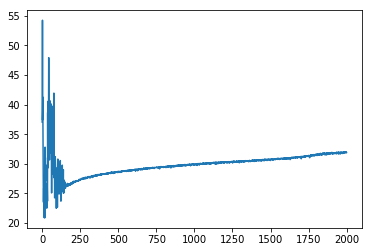

In [65]:
plt.plot(itera , cf)
plt.show()

In [66]:
zzz  = NN.forwardPropagation(training_data)
g = 0
n = []
for i in range(len(zzz)):
    if zzz[i] >= 0.5:
        n.append(1)
    else:
        n.append(0)
print(n )
print('Benign : ',n.count(1) , ' Malignent : ',n.count(0))
zzz

[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1]
Benign :  252  Malignent :  66


array([[0.50152747],
       [0.50471134],
       [0.50160034],
       [0.49929859],
       [0.50182007],
       [0.5029085 ],
       [0.50172856],
       [0.50025939],
       [0.50168241],
       [0.50316903],
       [0.50070847],
       [0.50013396],
       [0.5050568 ],
       [0.50183367],
       [0.49830074],
       [0.49993496],
       [0.50053364],
       [0.50000813],
       [0.56349232],
       [0.49996959],
       [0.51175713],
       [0.50183906],
       [0.49850793],
       [0.50201708],
       [0.50047096],
       [0.50790065],
       [0.50200547],
       [0.50228946],
       [0.50287576],
       [0.5013492 ],
       [0.49965192],
       [0.50065885],
       [0.50081478],
       [0.49970891],
       [0.50498122],
       [0.5003925 ],
       [0.5008041 ],
       [0.50285199],
       [0.50090803],
       [0.50161749],
       [0.50276959],
       [0.50195709],
       [0.49855189],
       [0.50000603],
       [0.50843562],
       [0.50129184],
       [0.50887322],
       [0.502

In [17]:
def completeGradientDecent(NN , X , y ):
    alpha = 0.001
    i = 1
    itera = []
    cf = []
    epsilon = 0.00001
    while True:
        
        initial_cost = NN.costFunction(X , y)
        
        t1,t2,t3 = NN.costFunctionDerivative(X , y)
        
        NN.theta_layer_1 = NN.theta_layer_1 - alpha * t1
        NN.theta_layer_2 = NN.theta_layer_2 - alpha * t2
        NN.theta_layer_3 = NN.theta_layer_3 - alpha * t3
        
        final_cost = NN.costFunction(X , y)
        
        itera.append(i)
        cf.append(final_cost)
        i+=1
        
        print("iteration {} value {}".format(i , final_cost))
        
        if(abs(final_cost - initial_cost) < epsilon):
            break
    return itera , cf

#itera, cf = completeGradientDecent(NN , training_data , training_label )